# Exploratory Data Analysis of Google PlayStore Apps

## We are going to analyse the dataset(taken from Kaggle) of all the Apps in Google Play store. We are going to understand the trends in Google Play Store market.

### Because as a developer, we should know the best constraints to focus on when launching our first app.

Let's get started...

# 1.Importing the required packages.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#To hide Warning messages.
import warnings
warnings.filterwarnings('ignore')

# 2. Reading the data. 

In [72]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [73]:
df.shape

(10841, 13)

Our dataset contains 10841 apps with 13 features to analyse. Let's first have a look on the features.

In [74]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# 3.Data Preprocessing

## 3.1 Handling Null Values

In [75]:
print(df.isnull().sum())

df.dropna(inplace=True) #Dropping Rows with Null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


As we can see, there are few null values in column 'Rating' ,'Content Rating','current Ver' and 'Android Ver'. So we have dropped the rows with null values.

Removing Duplicate Entries

In [76]:
df.drop_duplicates(inplace=True)

In [77]:
df.shape

(8886, 13)

Now, we have removed the null values and duplicate values from the dataset and we have got 8886 apps to analyse for their rating and performance.

## 3.2 Handling Data types of each feature

The Data Types of each feature

In [78]:
df.dtypes  # Displaying Data types of each feature.

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

The features 'Reviews', which tells the number of reviews of the app, must be of numeric type so we will change it.

In [79]:
df.Reviews = df.Reviews.astype('int64') #Changing to int type.

Other feature like 'Size','Installs','Price' and 'Android Ver' must be of numeric type too.

## Changing the feature - Installs

In [80]:
newInstalls = []

for row in df.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))

df.Installs = newInstalls

df.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

## Changing the feature -Size

In [81]:
newSize = []

for row in df.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0) #When it says - Size Varies.
    
df.Size = newSize

df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

## Changing the feature -Price

In [82]:
newPrice = []

for row in df.Price:
    if row != "0":
        newrow = float(row[1:])
    else:
        newrow = 0 
        
    newPrice.append(newrow)
        
df.Price = newPrice

df.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

## Changing the feature- Android version

In [83]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

## Changing the feature Last Updated

'Last Updated' feature tells us that if the developers are still improving the app or not. So we are just keeping the year of the Last Updated for easily visualizing.

In [84]:
changeLastUpdated=[]

for row in df['Last Updated']:
    changeLastUpdated.append(int(row[-4:]))
    
df['Last Updated'] = changeLastUpdated

df['Last Updated'].head(10)

0    2018
1    2018
2    2018
3    2018
4    2018
5    2017
6    2018
7    2018
8    2017
9    2018
Name: Last Updated, dtype: int64

# 4.Analysing features:

## 4.1 Categories

In [85]:
df.Category.value_counts()

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

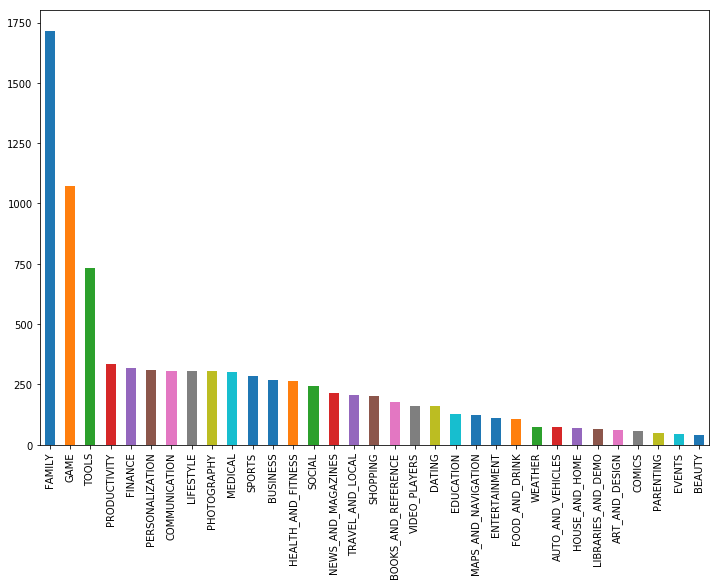

In [120]:
df.Category.value_counts().plot(kind='bar',figsize= (12,8))

It is clear that the apps belonging to FAMILY and GAME has most number of apps on play store followed by TOOLS and PRODUCTIVITY.

In [144]:
#display top 5 categories
top_cat=df.groupby('Category').size().reset_index(name='Count').nlargest(6,'Count')
display(top_cat)

,Category,Count
11,FAMILY,1717
14,GAME,1074
29,TOOLS,733
25,PRODUCTIVITY,334
12,FINANCE,317
23,PERSONALIZATION,308


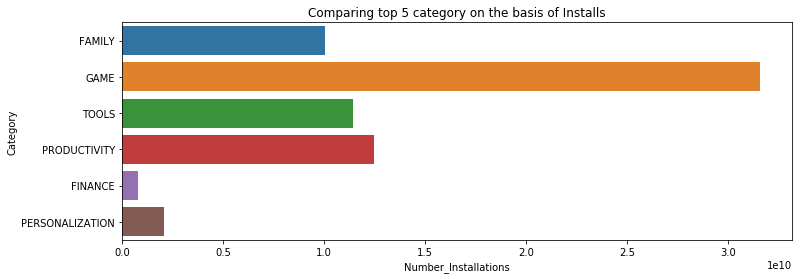

In [143]:
cat=top_cat.Category.tolist()
data_top6=df.groupby('Category')['Installs'].agg('sum').loc[cat].reset_index(name='Number_Installations')
data=df.groupby('Category')['Installs'].agg('sum').reset_index(name='Number_Installations')

#Comparing top 5 category on the basis of 'Installs'
def compare_6(data):
    fig = plt.figure(figsize=(12,4))
    title=plt.title('Comparing top 5 category on the basis of Installs')
    bar=sns.barplot(y=data['Category'],x=data['Number_Installations'])
    plt.show(bar)
    
compare_6(data_top6)


## 4.2 Ratings

In [87]:
df.Rating.describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

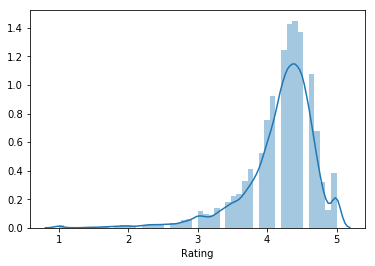

In [88]:
sns.distplot(df.Rating)

In [89]:
print("No. of Apps with full ratings: ",df.Rating[df['Rating'] == 5 ].count())

No. of Apps with full ratings:  271


And their are few apps having 5 star ratings too.

## 4.3 Reviews

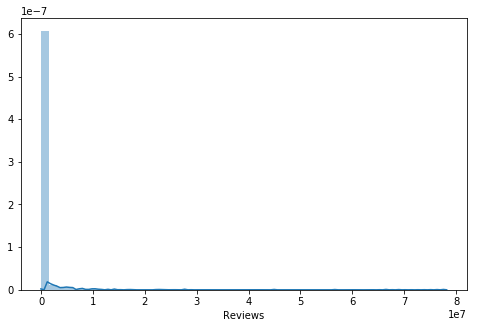

In [90]:
plt.figure(figsize=(8,5))
sns.distplot(df.Reviews)

In [153]:
display(df[df.Reviews>50000000].App)

335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
382     Messenger – Text and Video Chat for Free
2544                                    Facebook
2545                                   Instagram
2604                                   Instagram
3904                          WhatsApp Messenger
3909                                   Instagram
3943                                    Facebook
Name: App, dtype: object

In [154]:
sorted_by_reviews = df.sort_values(by=['Reviews'], ascending=False)
sorted_by_reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,0.0,1.000000e+09,Free,0.0,Teen,Social,2018,Varies with device,0.0
3943,Facebook,SOCIAL,4.1,78128208,0.0,1.000000e+09,Free,0.0,Teen,Social,2018,Varies with device,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1.000000e+09,Free,0.0,Everyone,Communication,2018,Varies with device,0.0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,0.0,1.000000e+09,Free,0.0,Everyone,Communication,2018,Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446,0.0,1.000000e+09,Free,0.0,Teen,Social,2018,Varies with device,0.0


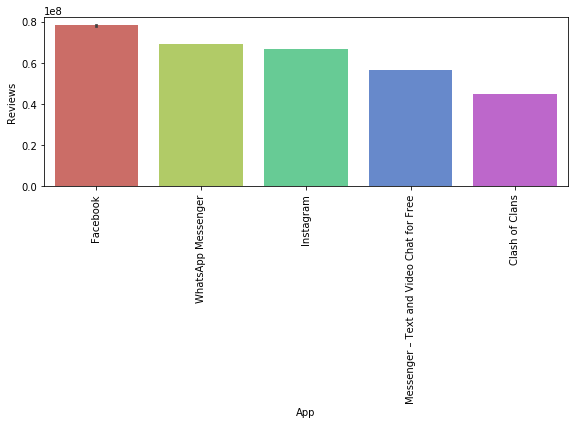

In [155]:
plt.figure(figsize=(8,6))
fig = sns.barplot(x=sorted_by_reviews['App'][:10], y=sorted_by_reviews['Reviews'][:10], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig)

And most reviewed app is Facebook itself.

## 4.4 Type:

([<matplotlib.patches.Wedge at 0x211795d7be0>,
 [Text(-1.07444,0.235773,'Free'), Text(1.07444,-0.235773,'Paid')],
 [Text(-0.586056,0.128604,'93.1%'), Text(0.586056,-0.128604,'6.9%')])

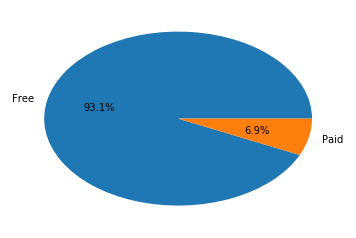

In [92]:
plt.pie(df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')

## 4.5 Price

In [93]:
df[df.Price == df.Price.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,2018,1.0.1,4.0


In [94]:
sorted_by_price = df.sort_values(by=['Price'], ascending=False)
sorted_by_price.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.00,Everyone,Lifestyle,2018,1.0.1,4.0
5362,I Am Rich Pro,FAMILY,4.4,201,2.7,5000.0,Paid,399.99,Everyone,Entertainment,2017,1.54,1.0
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41.0,1000.0,Paid,399.99,Everyone,Finance,2018,1.0.2,4.0
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000.0,Paid,399.99,Everyone,Finance,2017,1.6,4.0
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000.0,Paid,399.99,Everyone,Lifestyle,2018,2.0,4.0


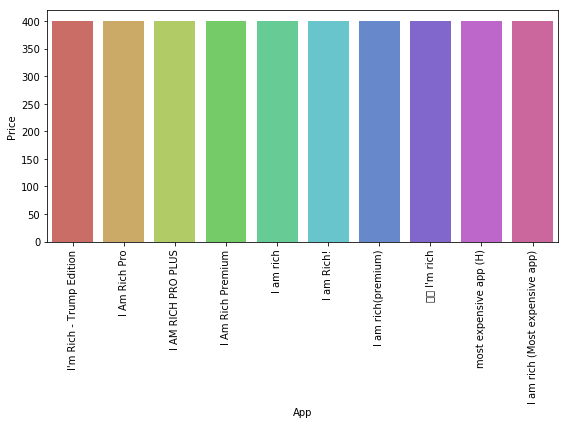

In [95]:
plt.figure(figsize=(8,6))
fig = sns.barplot(x=sorted_by_price['App'][:10], y=sorted_by_price['Price'][:10], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show(fig)

In [96]:
# Count plot of various versions

## 4.6 Andriod version

In [97]:
df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

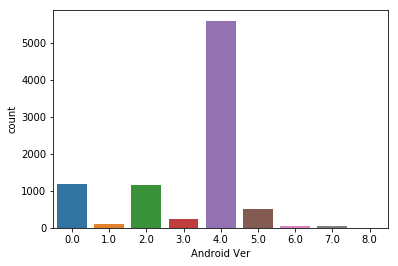

In [98]:
sns.countplot(df['Android Ver'])

Most of the apps have a minimum required version of 4.0 which include android Ice-cream sandwitch, Jellybean and Kitkat

# 5. Analysis on the basis of Rating

In [101]:
# Looking of the apps with 5.0 rating:

In [102]:
df_full = df[df.Rating == 5]

df_full.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000.0,Free,0.0,Everyone,Comics,2018,2.0,4.0
612,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000.0,Free,0.0,Mature 17+,Dating,2018,3.0,4.0
615,Awake Dating,DATING,5.0,2,70.0,100.0,Free,0.0,Mature 17+,Dating,2018,2.2.9,4.0
633,Spine- The dating app,DATING,5.0,5,9.3,500.0,Free,0.0,Teen,Dating,2018,4.0,4.0
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100.0,Free,0.0,Mature 17+,Dating,2018,8.2,4.0


In [103]:
# Distribution plot of 'Installs' of Apps with 5.0 Ratings

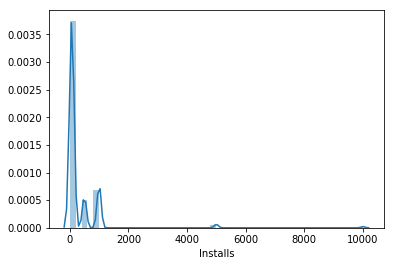

In [104]:
sns.distplot(df_full.Installs)

In [105]:
df_full.Installs.value_counts().sort_index()

1.0          3
5.0          8
10.0        48
50.0        32
100.0      112
500.0       27
1000.0      37
5000.0       3
10000.0      1
Name: Installs, dtype: int64

In [106]:
# Consider the Apps with 5.0 Ratings and Maximum Installs :

In [107]:
df_full_maxinstalls = df_full[df.Installs > 1000]

df_full_maxinstalls[['App', 'Category', 'Installs']]

,App,Category,Installs
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5000.0
8058,Oración CX,LIFESTYLE,5000.0
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5000.0
9511,Ek Bander Ne Kholi Dukan,FAMILY,10000.0


In [108]:
# Checking the No. of Reviews of 5.0 Rating Apps

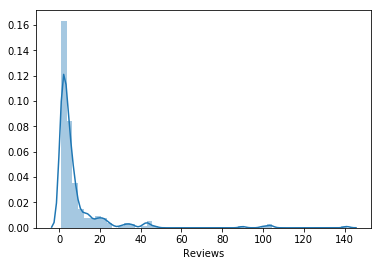

In [109]:
sns.distplot(df_full.Reviews)

In [110]:
df_full = df_full[df.Reviews > 30]

In [111]:
print("No. of Apps having 5.0 Rating with sufficient Reviews: ",df_full.App.count())

No. of Apps having 5.0 Rating with sufficient Reviews:  16


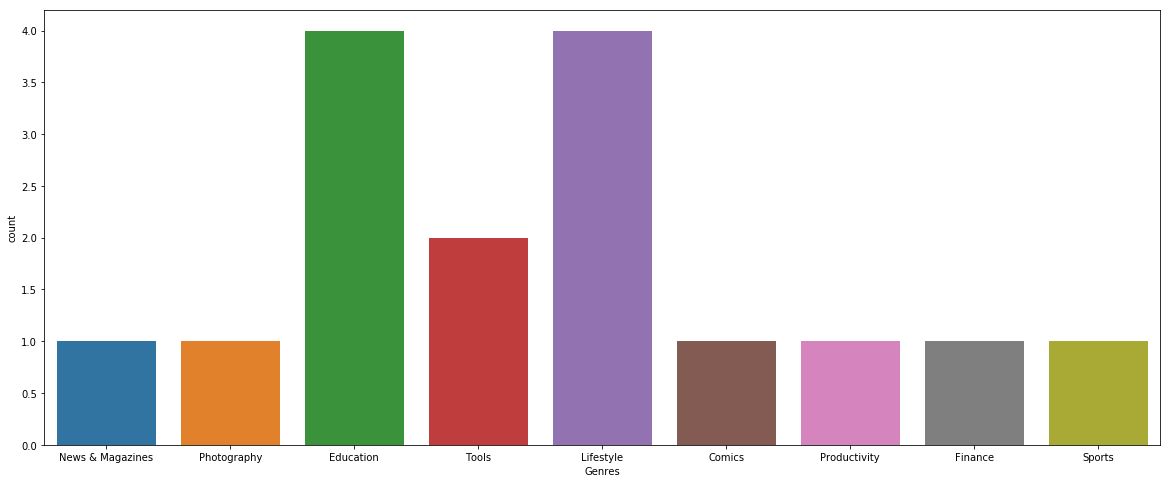

In [158]:
plt.figure(figsize=(20,8))
sns.countplot(df_full.Genres)

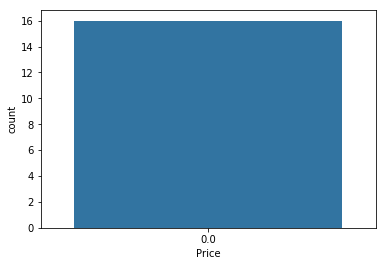

In [113]:
sns.countplot(df_full.Price)

# 6. Comparison on the basis of Contnent Rating

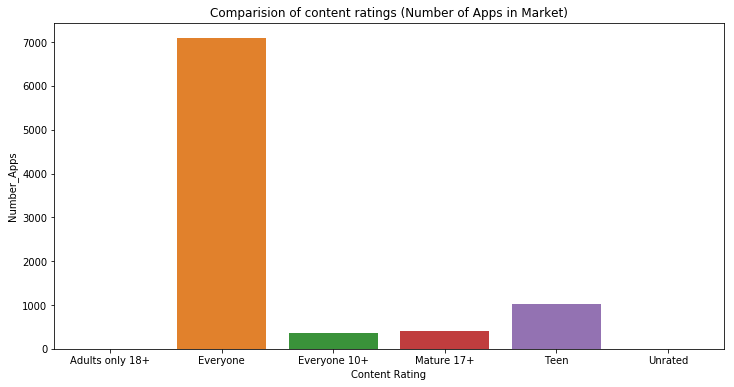

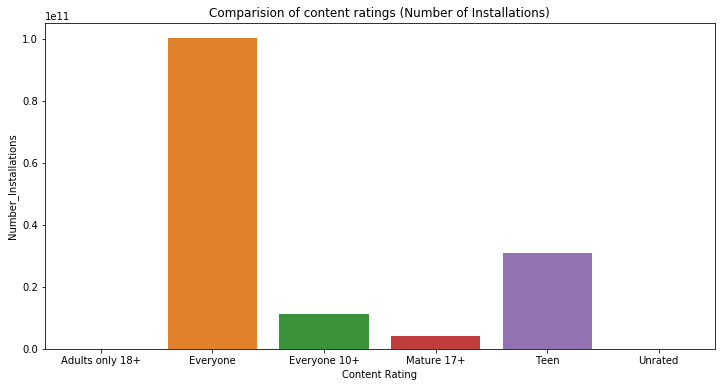

In [159]:
install_sum_content=df.groupby('Content Rating')['Installs'].agg('sum').reset_index(name='Number_Installations')
app_sum_content=data=df.groupby('Content Rating')['Installs'].size().reset_index(name='Number_Apps')

def content_bar_sum(data):
    fig=plt.figure(figsize=(12,6))
    
    title=plt.title('Comparision of content ratings (Number of Installations)')
    content_bar = sns.barplot(x=data['Content Rating'],y=data['Number_Installations'])
    plt.show(content_bar)
    
def content_bar_count(data):
    fig=plt.figure(figsize=(12,6))
    
    title=plt.title('Comparision of content ratings (Number of Apps in Market)')
    content_bar = sns.barplot(x=data['Content Rating'],y=data['Number_Apps'])
    plt.show(content_bar)
    
content_bar_count(app_sum_content)
content_bar_sum(install_sum_content)


There are more apps with rating of '17+' than '10+', but there are more number of installs of '10+' than '17+'. And number of apps with 'Adult' rating is negligible.

# Conclusion
 So this ends our analysis.
 There are so many apps on play store but launch a new app we have to consider so many factors.
 We have learnt that every feature has their importance and they impact on app's performance on play store.

We also want to say that, in the world where people are more involved in Machine Learning and Deep Learning, we should also focus on EDA. It is the very basic and initial step before using the datasets to create models. We should first analyze and visulaize the dataset. EDA is an important subject too.

## - Kashish Chugh
## - Shalini Singh

                                                  Thank You!!!